In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [31]:
train_df = pd.read_csv('train.csv')

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Descriptive Statistics of Numerical Features

In [33]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Missing Values Count

In [34]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Survival Distribution

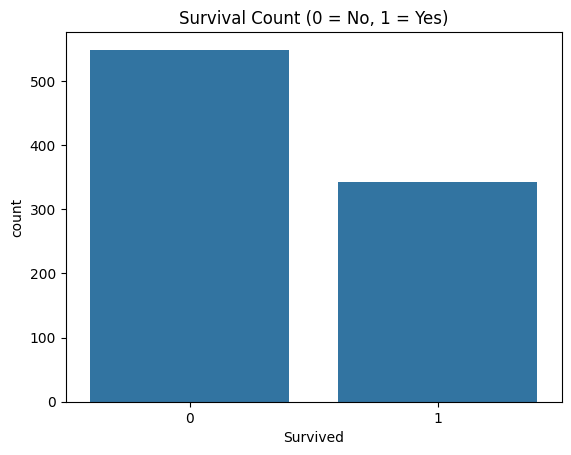

In [35]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

## Survival by Gender

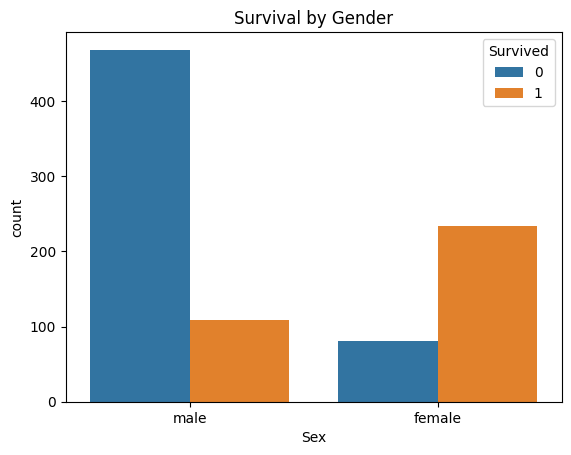

In [36]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.show()

## Survival by Passenger Class

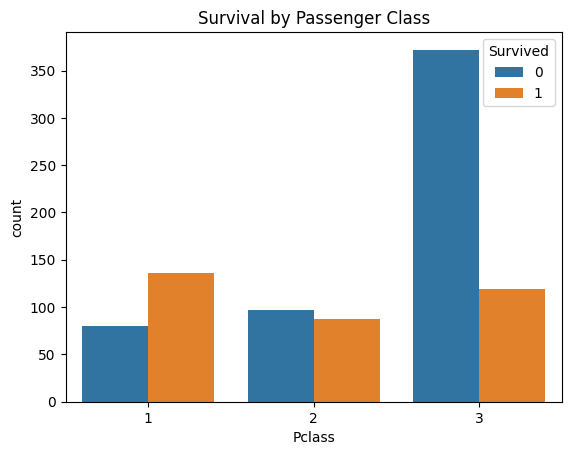

In [37]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

## Age Distribution

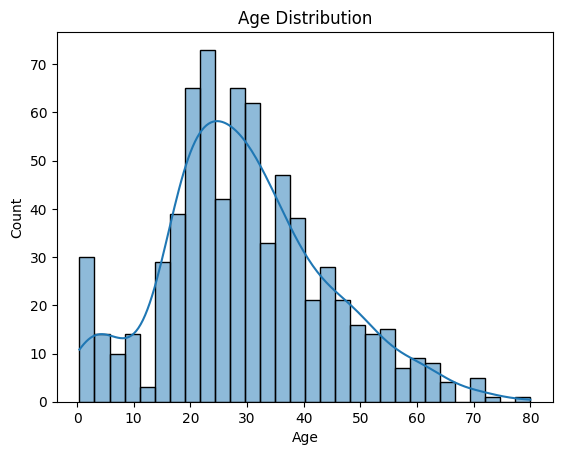

In [38]:
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

## Fare Distribution

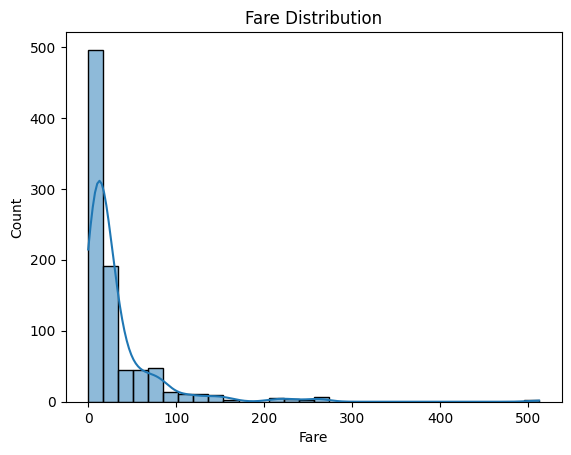

In [39]:
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

## Handling Missing Data

In [40]:
cleaned_df = train_df.copy()

cleaned_df['Age'].fillna(cleaned_df['Age'].median(), inplace=True)

cleaned_df['Embarked'].fillna(cleaned_df['Embarked'].mode()[0], inplace=True)

cleaned_df.drop('Cabin', axis=1, inplace=True)

print("Missing values after cleaning:")
print(cleaned_df.isnull().sum())

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-955362203.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Age'].fillna(cleaned_df['Age'].median(), inplace=True)
/tmp/ipython-input-955362203.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

## Feature Engineering

In [41]:
cleaned_df['FamilySize'] = cleaned_df['SibSp'] + cleaned_df['Parch'] + 1

## Encoding Categorical Features

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
cleaned_df['Sex'] = le.fit_transform(cleaned_df['Sex'])

ohe = pd.get_dummies(cleaned_df, columns=['Embarked'], drop_first=True)
cleaned_df = ohe

print("\nDataFrame after encoding:")
print(cleaned_df[['Sex', 'Embarked_Q', 'Embarked_S']].head())


DataFrame after encoding:
   Sex  Embarked_Q  Embarked_S
0    1       False        True
1    0       False       False
2    0       False        True
3    0       False        True
4    1       False        True


## Scaling Numerical Features

In [43]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Fare']

ss = StandardScaler()
cleaned_df[numerical_features] = ss.fit_transform(cleaned_df[numerical_features])

print("\nDataFrame after scaling numerical features:")
print(cleaned_df[['Age', 'Fare']].head())


DataFrame after scaling numerical features:
        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


## Survival by Family Size

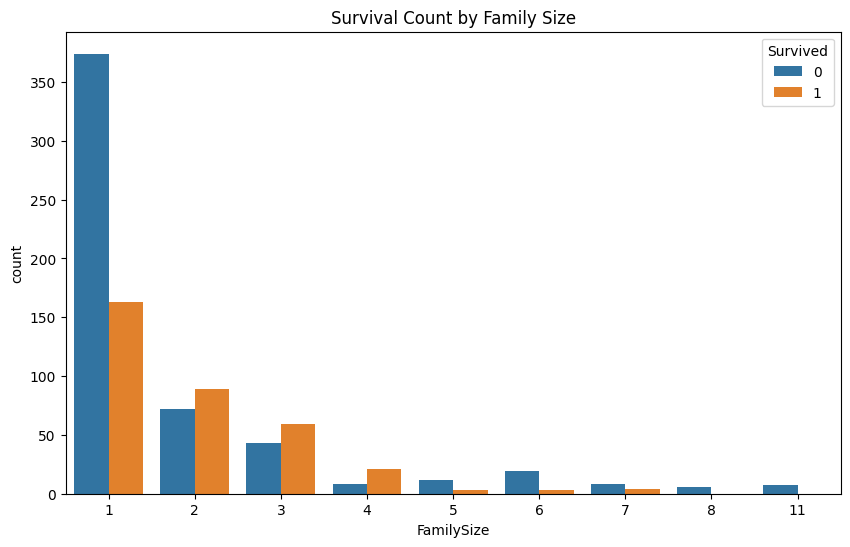

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=cleaned_df)
plt.title('Survival Count by Family Size')
plt.show()

## Birvariate Analysis: Age vs Fare with Survival

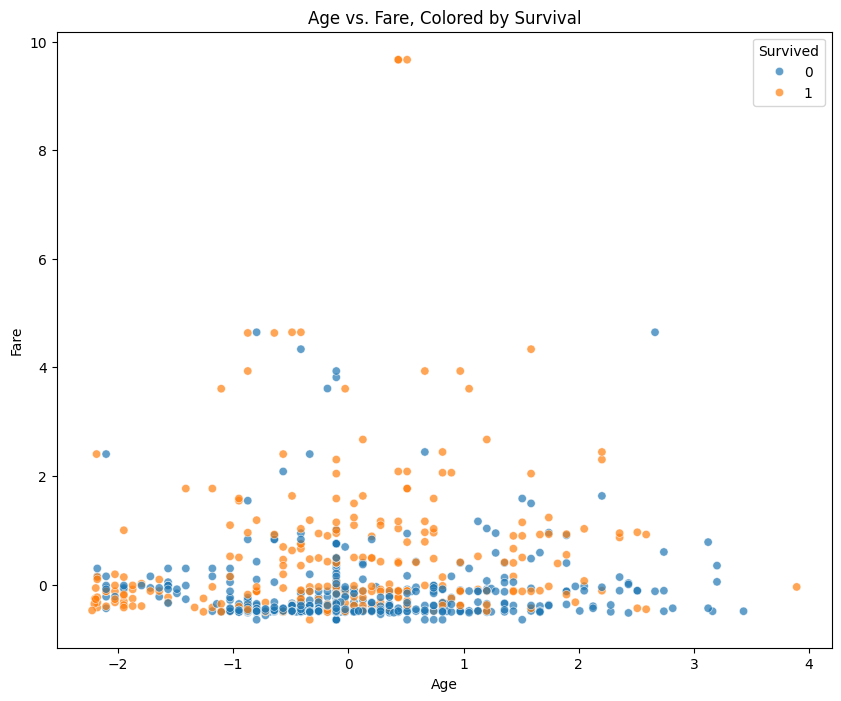

In [45]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=cleaned_df, alpha=0.7)
plt.title('Age vs. Fare, Colored by Survival')
plt.show()

In [46]:
final_df = cleaned_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

final_df.to_csv('titanic_cleaned_dataset.csv', index=False)

print("Columns in final dataframe:")
print(final_df.columns)

Columns in final dataframe:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


## Dataframe Details After Cleaning

In [47]:
cleaned_df = pd.read_csv('titanic_cleaned_dataset.csv')

In [48]:
print("DataFrame Info")
cleaned_df.info()

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   FamilySize  891 non-null    int64  
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [49]:
print("Missing Values Count")
print(cleaned_df.isnull().sum())

Missing Values Count
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Embarked_Q    0
Embarked_S    0
dtype: int64


# Model Training

In [50]:
df = pd.read_csv('titanic_cleaned_dataset.csv')

## Feature and Target Definition
Here we drop the PassengerId column as it does not contribute to model training and features.

In [51]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

## Train-Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
## Model Initialization and Training

In [53]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## K-Fold Validation

In [57]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(dt_model, X, y, cv=5, scoring=scoring_metrics)
print("Average Metrics from 5-Fold Cross-Validation:")
print(f"- Average Accuracy: {np.mean(cv_results['test_accuracy']):.4f} (±{np.std(cv_results['test_accuracy']):.4f})")
print(f"- Average Precision: {np.mean(cv_results['test_precision']):.4f} (±{np.std(cv_results['test_precision']):.4f})")
print(f"- Average Recall:    {np.mean(cv_results['test_recall']):.4f} (±{np.std(cv_results['test_recall']):.4f})")
print(f"- Average F1-Score:  {np.mean(cv_results['test_f1']):.4f} (±{np.std(cv_results['test_f1']):.4f})")

Average Metrics from 5-Fold Cross-Validation:
- Average Accuracy: 0.7801 (±0.0328)
- Average Precision: 0.7200 (±0.0428)
- Average Recall:    0.6988 (±0.0564)
- Average F1-Score:  0.7086 (±0.0468)
